In [134]:
import pandas as pd
import numpy as np 

In [135]:
train = pd.read_csv("./data/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [136]:
train.shape

(1460, 81)

In [137]:
test = pd.read_csv("./data/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [138]:
test.shape

(1459, 80)

In [139]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [140]:
qualitative

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [141]:
quantitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

<AxesSubplot:>

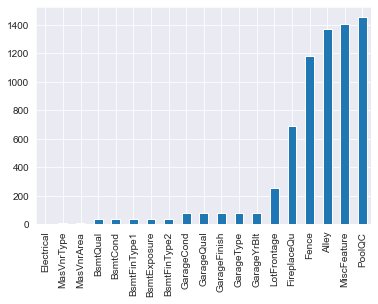

In [142]:
import seaborn as sns
sns.set_style("darkgrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [143]:
# # Dealing with missing values for numerical features

# # use median to represent LotFrontage missing value
# train.LotFrontage.fillna(train.LotFrontage.median(), inplace=True)

# # N/A means the facility does not exist. I use 0 to represent non-exisistent
# train.GarageYrBlt.fillna(0,inplace=True)
# train.MasVnrArea.fillna(0,inplace=True)
# train.BsmtFullBath.fillna(0,inplace=True)
# train.BsmtHalfBath.fillna(0,inplace=True)
# train.GarageArea.fillna(0,inplace=True)
# train.GarageCars.fillna(0,inplace=True)
# train.TotalBsmtSF.fillna(0,inplace=True)
# train.BsmtUnfSF.fillna(0,inplace=True)
# train.BsmtFinSF1.fillna(0,inplace=True)
# train.BsmtFinSF2.fillna(0,inplace=True)

In [144]:
# # Dealing with categorical values

# train.PoolQC.fillna("NA",inplace=True)
# train.MiscFeature.fillna("NA",inplace=True)
# train.Alley.fillna("NA",inplace=True)
# train.Fence.fillna('NA', inplace=True)         
# train.FireplaceQu.fillna('NA', inplace=True)    
# train.GarageCond.fillna('NA', inplace=True)    
# train.GarageQual.fillna('NA', inplace=True)     
# train.GarageFinish.fillna('NA', inplace=True)   
# train.GarageType.fillna('NA', inplace=True)     
# train.BsmtExposure.fillna('NA', inplace=True)     
# train.BsmtCond.fillna('NA', inplace=True)        
# train.BsmtQual.fillna('NA', inplace=True)        
# train.BsmtFinType2.fillna('NA', inplace=True)     
# train.BsmtFinType1.fillna('NA', inplace=True)     
# train.MasVnrType.fillna('None', inplace=True)   
# train.Exterior2nd.fillna('None', inplace=True) 


# for i in train.Neighborhood.unique():
#     if train.MSZoning[train.Neighborhood == i].isnull().sum() > 0:
#         train.loc[train.Neighborhood == i,'MSZoning'] = \
#         train.loc[train.Neighborhood == i,'MSZoning'].fillna(train.loc[train.Neighborhood == i,'MSZoning'].mode()[0])

In [145]:
# # General properties that all houses should have; Nans are missing values
# # Use most common value to replace the missing values
# train.Functional.fillna(train.Functional.mode()[0], inplace=True)       
# train.Utilities.fillna(train.Utilities.mode()[0], inplace=True)          
# train.Exterior1st.fillna(train.Exterior1st.mode()[0], inplace=True)        
# train.SaleType.fillna(train.SaleType.mode()[0], inplace=True)                
# train.KitchenQual.fillna(train.KitchenQual.mode()[0], inplace=True)        
# train.Electrical.fillna(train.Electrical.mode()[0], inplace=True)   

In [146]:

def HandleMissingValues(df):
    # for Object columns fill using 'UNKOWN'
    # for Numeric columns fill using median
    num_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
    cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
    values = {}
    for a in cat_cols:
        values[a] = 'UNKOWN'

    for a in num_cols:
        values[a] = df[a].median()
        
    df.fillna(value=values,inplace=True)
    
    
HandleMissingValues(train)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,UNKOWN,Reg,Lvl,AllPub,...,0,UNKOWN,UNKOWN,UNKOWN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,UNKOWN,Reg,Lvl,AllPub,...,0,UNKOWN,UNKOWN,UNKOWN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,UNKOWN,IR1,Lvl,AllPub,...,0,UNKOWN,UNKOWN,UNKOWN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,UNKOWN,IR1,Lvl,AllPub,...,0,UNKOWN,UNKOWN,UNKOWN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,UNKOWN,IR1,Lvl,AllPub,...,0,UNKOWN,UNKOWN,UNKOWN,0,12,2008,WD,Normal,250000


In [150]:
#Categorical Feature Encoding

def getObjectColumnsList(df):
    return [cname for cname in df.columns if df[cname].dtype == "object"]

def PerformOneHotEncoding(df,columnsToEncode):
    return pd.get_dummies(df,columns = columnsToEncode)

cat_cols = getObjectColumnsList(train)
train = PerformOneHotEncoding(train,cat_cols)
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [152]:
# print(train.Neighborhood.unique())
# print(train.MSZoning.isnull().sum())
# print(train.MSZoning.unique())
train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=306)

In [153]:
train.isnull().sum().sum()

0

In [154]:
train = train.drop(columns=["Id"],axis=1)
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [155]:
import numpy as np 

# split the original dataset to 70% for training and 30% for testing
train_row = int((train.shape[0]*0.7))
train_row
test_row = train.shape[0]-train_row
test_row
# train = train[:int((train.shape[0]*0.7))]

439

In [156]:
train_df = train[:train_row]
print(train_df.shape)
train_df.tail()

(1021, 305)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1016,20,73.0,11883,7,5,1996,1996,196.0,690,0,...,0,0,0,1,0,0,0,0,1,0
1017,120,69.0,5814,8,5,1984,1984,0.0,1036,0,...,0,0,0,0,1,0,0,0,0,0
1018,80,69.0,10784,7,5,1991,1992,76.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1019,120,43.0,3013,7,5,2005,2005,145.0,16,0,...,0,0,0,1,0,0,0,0,1,0
1020,20,60.0,7024,4,5,2005,2005,0.0,1024,0,...,0,0,0,1,0,0,0,0,1,0


In [157]:
test_df = train[-test_row:]
test_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1021,20,64.0,7406,7,5,2006,2006,84.0,684,0,...,0,1,0,0,0,0,0,0,0,1
1022,50,52.0,9439,5,5,1930,1950,0.0,324,0,...,0,0,0,1,0,0,0,0,1,0
1023,120,43.0,3182,7,5,2005,2006,14.0,16,0,...,0,0,0,1,0,0,0,0,1,0
1024,20,69.0,15498,8,6,1976,1976,0.0,1165,400,...,0,0,0,0,1,0,0,0,0,0
1025,20,70.0,7700,5,5,1972,1972,0.0,138,468,...,0,0,0,1,0,0,0,0,1,0


In [158]:
# # using RMSE to evaulate the performance of the data
# train_df["SalePrice"] = np.log(train_df.SalePrice)
# train_df

In [159]:
# Get X,y for modeling

X = train_df.drop(columns="SalePrice")
y = train_df.loc[:,"SalePrice"]

In [163]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5, random_state=0).fit(X, y)
lasso_cv.score(X,y)

0.7673719075029253

In [173]:
lasso_cv_preds = lasso_cv.predict(test_df.drop(columns="SalePrice"))
lasso_cv_preds

array([189790.50137301, 115490.09046341, 184729.05033821, 316028.95915941,
       118365.45832697, 178115.30420264, 276921.79373501, 126963.57342825,
       129180.68480221, 135329.09406331, 282934.74338521, 304792.90622343,
       268865.32569774,  95335.37531579,  61364.73960419, 266361.30379303,
       276237.16512867,  97611.06377629,  79873.78199517, 192949.09809549,
       184152.56005098, 205684.99051293, 277261.9251688 , 333098.43269784,
       128093.81776466, 345854.52017604, 160978.09871279, 131498.50646223,
        65358.22395892, 167830.80148765, 170414.77012139, 211648.18630639,
       177761.32835595, 247510.32313353, 190936.25951965, 201803.90084979,
       214993.59200835, 277450.75684734, 203197.64085916, 191127.03810759,
       171377.34276473, 199786.51713644, 138573.99161478, 165492.65679197,
       270783.28636719, 159779.87313207, 191797.77365967, 270045.31764249,
       124558.53725359, 130708.57169524, 160215.69540114, 131507.25129024,
       165785.20827553, 1

In [174]:
# calculate MSE

def mse(y_true, y_pred):
    return np.mean((y_true-y_pred)**2)

In [178]:
y_pred = lasso_cv_preds
y_true = test_df.SalePrice.tolist()

mse_value = 0
for i in range(test_df.shape[0]):
    mse_value += mse(y_true[i],y_pred[i])
mse_value
    

1194240832490.7703